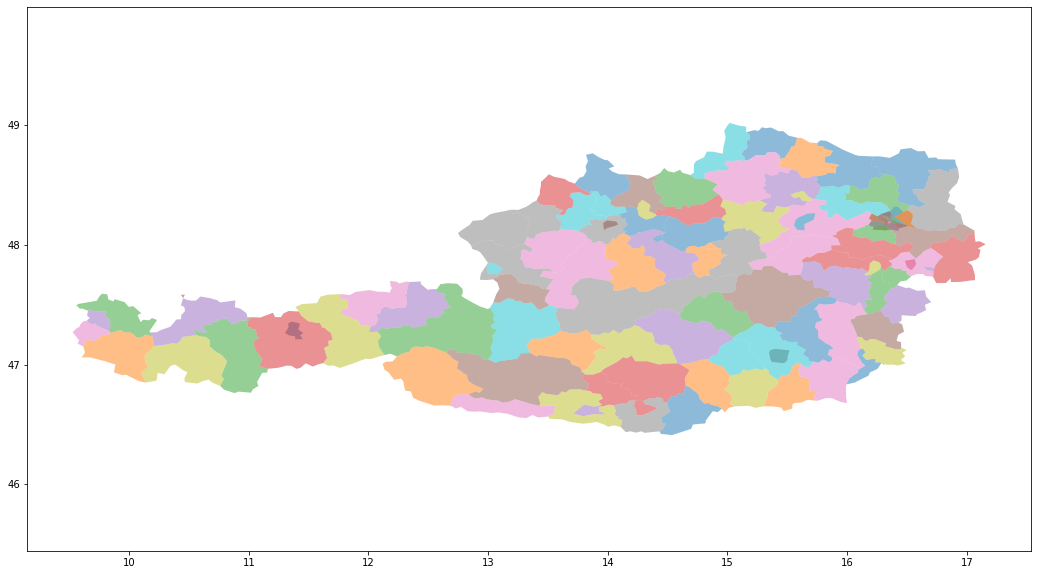

In [1]:
import json
import numpy as np
import os
import matplotlib.pyplot as plt

#Load and read the geojson file for Italys regions. 

#at_url = "https://github.com/ginseng666/GeoJSON-TopoJSON-Austria/blob/81df08cced08b02a873f6375e17424e053a99ac0/2021/simplified-99.9/bezirke_999_geo.json"
#with urllib.request.urlopen(at_url) as url:
        #jdata = json.loads(url.read().decode())
MY_PATH = r'C:\Users\bscho\Documents\DL\lrgtxt0'
os.chdir(MY_PATH)
with open('AT.geojson', 'r', encoding='utf-8') as f:
    jdata = json.load(f)

fig, axs = plt.subplots()
axs.set_aspect('equal', 'datalim')
fig.set_size_inches(18, 10)

pts = []  # list of points defining boundaries of polygons
for  feature in jdata['features']:
    if feature['geometry']['type'] == 'Polygon':
        pts.extend(feature['geometry']['coordinates'][0])      
        
    elif feature['geometry']['type'] == 'MultiPolygon':
        for polyg in feature['geometry']['coordinates']:
            x = [el[0] for el in polyg[0]]
            y = [el[1] for el in polyg[0]]
            axs.fill(x, y, alpha=0.5)
    elif feature['geometry']['type'] == 'LineString': 
        pts.extend(feature['geometry']['coordinates'])
    else: pass           

plt.show()

In [1]:
import pandas as pd
pd.options.plotting.backend = "plotly"

df = pd.DataFrame(dict(a=[1,3,2], b=[3,2,1]))
fig = df.plot()
fig.show()

In [4]:
for x in range(1,5):
    print([x+1, x**x+1, x**(x**x)+1])

[2, 2, 2]
[3, 5, 17]
[4, 28, 7625597484988]
[5, 257, 13407807929942597099574024998205846127479365820592393377723561443721764030073546976801874298166903427690031858186486050853753882811946569946433649006084097]


In [3]:
import cmath

c1 = 3 + 6j
c2 = 6 + 15j
print("Division of two complex number =", c1 / c2)
c = 1 + 2j
print('e^c =', cmath.exp(c))
print('log2(c) =', cmath.log(c, 2))
print('log10(c) =', cmath.log10(c))
print('sqrt(c) =', cmath.sqrt(c))

Division of two complex number = (0.4137931034482759-0.03448275862068964j)
e^c = (-1.1312043837568135+2.4717266720048188j)
log2(c) = (1.1609640474436813+1.5972779646881088j)
log10(c) = (0.3494850021680094+0.480828578784234j)
sqrt(c) = (1.272019649514069+0.7861513777574233j)


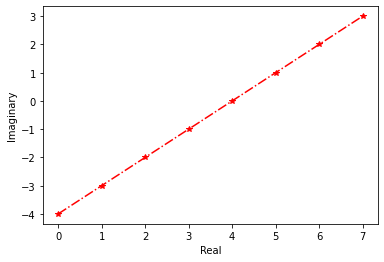

In [6]:
import matplotlib.pyplot as plt
import numpy as np
  
# create data of complex numbers using numpy
data = np.arange(8) + 1j*np.arange(-4, 4)
  
# extract real part using numpy
x = data.real
# extract imaginary part using numpy
y = data.imag
  
# plot the complex numbers
plt.plot(x, y, '-.r*')
plt.ylabel('Imaginary')
plt.xlabel('Real')
plt.show()

In [1]:
import random

def flip_coin():
    return random.choice([0, 1])  # 0=H, 1=T

def play_game():
    flp = (flip_coin(), flip_coin())
    res = [0, 0]
    if flp[0]==0 or flp[1]==0:
        res[0] = 1
    if flp[0] == flp[1]:
        res[1] = 1
    return res

total = [0, 0]
for i in range(1000):
    this_round = play_game()
    total[0] += this_round[0]
    total[1] += this_round[1]
print(total)

[752, 523]


529
529


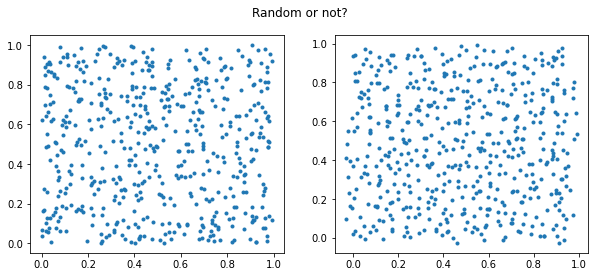

In [2]:
# random or not
import numpy as np
from matplotlib import pyplot as plt

def rand_array(n):
    return np.array(np.random.rand(n, 2))

def nonrand_array(n):
    ns = int(np.sqrt(n)) + 1
    res = []
    for nx in range(ns):
        for ny in range(ns):
            res.append((nx/ns+(2*np.random.rand()-1)/28, ny/ns+(2*np.random.rand()-1)/28))
    return np.array(res)
    
rarr = rand_array(529)
print(len(rarr))

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_figwidth(10)
fig.suptitle('Random or not?')
ax1.scatter(rarr[:,0], rarr[:,1], marker='.')

rarr = nonrand_array(500)
print(len(rarr))

ax2.scatter(rarr[:,0], rarr[:,1], marker='.')

plt.show()

-781.1421307254839
1.0739576808900986
23.855321172560277
11.292205411241698
2.647809071183052


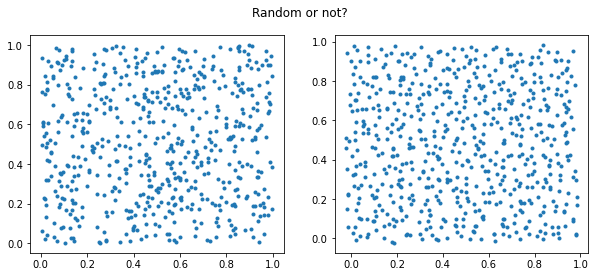

-784.3300332409101
1.3363648775722594
24.0839324374644
11.536336012132077
2.6745621460419735


In [3]:
# random or not - with entropy
import numpy as np
from matplotlib import pyplot as plt
import math

def entropy(p):
    'point-entropy of occurance with probability p.'
    if p != 0:
        return - p * math.log(p, 2)
    return 0.

def info_content(p):
    'information content of event with probability p.'
    if p != 0:
        return - math.log(p, 2)
    return 0.

def tot_entropy(dist):
    return sum([entropy(x) for x in dist])

def rand_array(n):
    return np.array(np.random.rand(n, 2))

def nonrand_array(n, pert=40):
    ns = int(np.sqrt(n)) + 1
    res = []
    for nx in range(ns):
        for ny in range(ns):
            res.append([nx/ns+(2*np.random.rand()-1)/pert, ny/ns+(2*np.random.rand()-1)/pert])
    return np.array(res)

def point_grid(arr, n):
    dx = max(arr[:,0]) / n
    dy = max(arr[:,1]) / n
    res = np.zeros((n, n))
    for nx in range(n):
        x = dx * nx
        for ny in range(n):
            y = dy * ny
            for pt in arr:
                if pt[0] > x and pt[0] < x+dx and pt[1] > y and pt[1] < y+dy:
                    res[nx][ny] += 1
    return res / (n**2)
    
npoints = 600

rarr = rand_array(npoints)
#print(tot_entropy_2d(rarr))

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_figwidth(10)
fig.suptitle('Random or not?')
ax1.scatter(rarr[:,0], rarr[:,1], marker='.')

print(tot_entropy(point_grid(rarr, 2).flatten()))
print(tot_entropy(point_grid(rarr, 5).flatten()))
print(tot_entropy(point_grid(rarr, 10).flatten()))
print(tot_entropy(point_grid(rarr, 20).flatten()))
print(tot_entropy(point_grid(rarr, 50).flatten()))

rarr = nonrand_array(npoints)
#print(tot_entropy_2d(rarr))

ax2.scatter(rarr[:,0], rarr[:,1], marker='.')

plt.show()

print(tot_entropy(point_grid(rarr, 2).flatten()))
print(tot_entropy(point_grid(rarr, 5).flatten()))
print(tot_entropy(point_grid(rarr, 10).flatten()))
print(tot_entropy(point_grid(rarr, 20).flatten()))
print(tot_entropy(point_grid(rarr, 50).flatten()))

(0.665682745007314, 3.19)
(0.31341435083644353, 10.685950413223141)


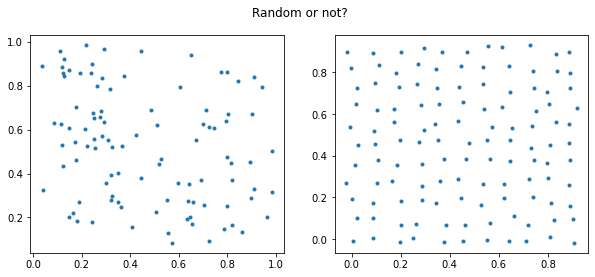

In [3]:
# random or not - determine average structure path lengths (thus measuring the structure sizes) and compare
# to Ramsey number ranges
import numpy as np
from matplotlib import pyplot as plt
import math

def entropy(p):
    'point-entropy of occurance with probability p.'
    if p != 0:
        return - p * math.log(p, 2)
    return 0.

def info_content(p):
    'information content of event with probability p.'
    if p != 0:
        return - math.log(p, 2)
    return 0.

def tot_entropy(dist):
    return sum([entropy(x) for x in dist])

def rand_array(n):
    return np.array(np.random.rand(n, 2))

def nonrand_array(n, pert=40):
    ns = int(np.sqrt(n)) + 1
    res = []
    for nx in range(ns):
        for ny in range(ns):
            res.append([nx/ns+(2*np.random.rand()-1)/pert, ny/ns+(2*np.random.rand()-1)/pert])
    return np.array(res)

def point_grid(arr, n):
    dx = max(arr[:,0]) / n
    dy = max(arr[:,1]) / n
    res = np.zeros((n, n))
    for nx in range(n):
        x = dx * nx
        for ny in range(n):
            y = dy * ny
            for pt in arr:
                if pt[0] > x and pt[0] < x+dx and pt[1] > y and pt[1] < y+dy:
                    res[nx][ny] += 1
    return res / (n**2)

def dist(p0, p1):
    return math.sqrt((p0[0] - p1[0])**2 + (p0[1] - p1[1])**2)

def next_point(ip, parr):
    d_min = 1000.
    idx_min = 0
    for npt, pt in enumerate(parr):
        nxt_dist = dist(parr[ip], pt)
        if nxt_dist < d_min and ip != npt:
            d_min = nxt_dist
            idx_min = npt
    return parr[idx_min]

def connected_path(arr):
    avrg_plen = 0
    avrg_npths = 0
    for curr_pt in arr:
        plen = 100
        for ipt, pt in enumerate(arr):
            nxt_pt = next_point(ipt, arr)
            nxt_dist = dist(curr_pt, nxt_pt)
            if nxt_dist < (plen / (ipt+1)):
                curr_pt = nxt_pt
            else:
                if ipt > 0:
                    break
            if ipt > 0:
                plen += nxt_dist
            else:
                plen = 2*nxt_dist + 1
        avrg_plen += plen / (ipt+1)
        avrg_npths += ipt
    return (avrg_plen / len(arr), avrg_npths / len(arr))
    
npoints = 100

rarr = rand_array(npoints)  # [[0.4665337  0.86647536]...
print(connected_path(rarr))

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_figwidth(10)
fig.suptitle('Random or not?')
ax1.scatter(rarr[:,0], rarr[:,1], marker='.')

rarr = nonrand_array(npoints)
print(connected_path(rarr))

ax2.scatter(rarr[:,0], rarr[:,1], marker='.')

plt.show()

In [2]:
# Ramsey numbers upper bounds
import math

print([(m,n,math.factorial(m+n-2) / math.factorial(m-1) / math.factorial(n-1)) for n in range(1, 10) for m in range(1,10)])

[(1, 1, 1.0), (2, 1, 1.0), (3, 1, 1.0), (4, 1, 1.0), (5, 1, 1.0), (6, 1, 1.0), (7, 1, 1.0), (8, 1, 1.0), (9, 1, 1.0), (1, 2, 1.0), (2, 2, 2.0), (3, 2, 3.0), (4, 2, 4.0), (5, 2, 5.0), (6, 2, 6.0), (7, 2, 7.0), (8, 2, 8.0), (9, 2, 9.0), (1, 3, 1.0), (2, 3, 3.0), (3, 3, 6.0), (4, 3, 10.0), (5, 3, 15.0), (6, 3, 21.0), (7, 3, 28.0), (8, 3, 36.0), (9, 3, 45.0), (1, 4, 1.0), (2, 4, 4.0), (3, 4, 10.0), (4, 4, 20.0), (5, 4, 35.0), (6, 4, 56.0), (7, 4, 84.0), (8, 4, 120.0), (9, 4, 165.0), (1, 5, 1.0), (2, 5, 5.0), (3, 5, 15.0), (4, 5, 35.0), (5, 5, 70.0), (6, 5, 126.0), (7, 5, 210.0), (8, 5, 330.0), (9, 5, 495.0), (1, 6, 1.0), (2, 6, 6.0), (3, 6, 21.0), (4, 6, 56.0), (5, 6, 126.0), (6, 6, 252.0), (7, 6, 462.0), (8, 6, 792.0), (9, 6, 1287.0), (1, 7, 1.0), (2, 7, 7.0), (3, 7, 28.0), (4, 7, 84.0), (5, 7, 210.0), (6, 7, 462.0), (7, 7, 924.0), (8, 7, 1716.0), (9, 7, 3003.0), (1, 8, 1.0), (2, 8, 8.0), (3, 8, 36.0), (4, 8, 120.0), (5, 8, 330.0), (6, 8, 792.0), (7, 8, 1716.0), (8, 8, 3432.0), (9, 8, 643

##### this works as expected: the average number of steps in the "real" random graph corresponds better to the appropriate Ramsey number

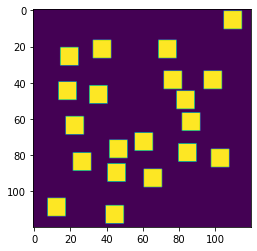

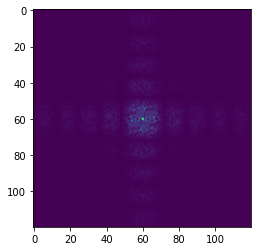

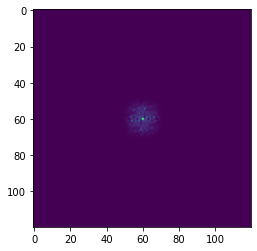

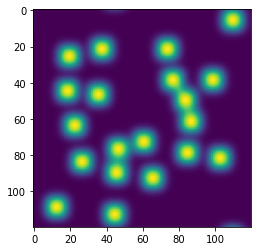

In [5]:
import numpy as np
import pylab

# image size, square side length, number of squares
ncols, nrows = 120, 120
sq_size, nsq = 10, 20

# The image array (0=background, 1=square) and boolean array of allowed places
# to add a square so that it doesn't touch another or the image sides
image = np.zeros((nrows, ncols))
sq_locs = np.zeros((nrows, ncols), dtype=bool)
sq_locs[1:-sq_size-1:,1:-sq_size-1] = True

def place_square():
    """ Place a square at random on the image and update sq_locs. """
    # valid_locs is an array of the indices of True entries in sq_locs
    valid_locs = np.transpose(np.nonzero(sq_locs))
    # pick one such entry at random, and add the square so its top left
    # corner is there; then update sq_locs
    i, j = valid_locs[np.random.randint(len(valid_locs))]
    image[i:i+sq_size, j:j+sq_size] = 1
    imin, jmin = max(0,i-sq_size-1), max(0, j-sq_size-1)
    sq_locs[imin:i+sq_size+1, jmin:j+sq_size+1] = False

# Add the required number of squares to the image
for i in range(nsq):
    place_square()
pylab.imshow(image)
pylab.show()

# Take the 2-dimensional DFT and centre the frequencies
ftimage = np.fft.fft2(image)
ftimage = np.fft.fftshift(ftimage)
pylab.imshow(np.abs(ftimage))
pylab.show()


# Build and apply a Gaussian filter.
sigmax, sigmay = 10, 10
cy, cx = nrows/2, ncols/2
x = np.linspace(0, nrows, nrows)
y = np.linspace(0, ncols, ncols)
X, Y = np.meshgrid(x, y)
gmask = np.exp(-(((X-cx)/sigmax)**2 + ((Y-cy)/sigmay)**2))

ftimagep = ftimage * gmask
pylab.imshow(np.abs(ftimagep))
pylab.show()

# Finally, take the inverse transform and show the blurred image
imagep = np.fft.ifft2(ftimagep)
pylab.imshow(np.abs(imagep))
pylab.show()

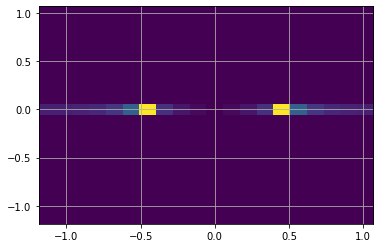

In [19]:
import numpy as np
from matplotlib import pyplot as plt

fq = 10; N = 20
x = np.linspace(0,8,N); y = x
xx, yy = np.meshgrid(x,y)
fnc = np.sin(2*np.pi*fq*xx)
ft = np.fft.fft2(fnc)
ft = np.fft.fftshift(ft)

freq_x  = np.fft.fftfreq(ft.shape[0], d=8 / (N - 1))  # this takes an argument for the timestep
freq_y  = np.fft.fftfreq(ft.shape[1], d=8 / (N - 1))
plt.imshow(
    abs(ft),
    aspect='auto',
    extent=(freq_x.min(),freq_x.max(),freq_y.min(),freq_y.max()),
    origin='lower' ,          # this fixes your problem
    interpolation='nearest',  # this makes it easier to see what is happening
    cmap='viridis'            # let's use a better color map too
)
plt.grid()
plt.show()

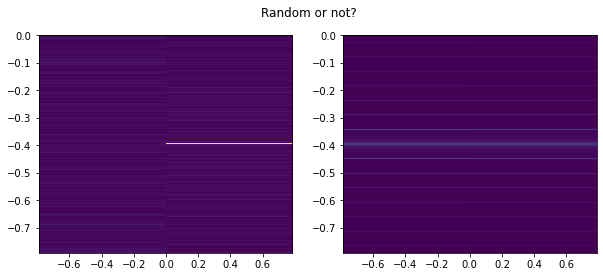

In [2]:
# random or not - determine average structure path lengths (thus measuring the structure sizes) and compare
# to Ramsey number ranges
import numpy as np
from matplotlib import pyplot as plt
import math
from scipy.fftpack import fft2, ifft2

def entropy(p):
    'point-entropy of occurance with probability p.'
    if p != 0:
        return - p * math.log(p, 2)
    return 0.

def info_content(p):
    'information content of event with probability p.'
    if p != 0:
        return - math.log(p, 2)
    return 0.

def tot_entropy(dist):
    return sum([entropy(x) for x in dist])

def rand_array(n):
    return np.array(np.random.rand(n, 2))

def nonrand_array(n, pert=40):
    ns = int(np.sqrt(n)) + 1
    res = []
    for nx in range(ns):
        for ny in range(ns):
            res.append([nx/ns+(2*np.random.rand()-1)/pert, ny/ns+(2*np.random.rand()-1)/pert])
    return np.array(res)

def point_grid(arr, n):
    dx = max(arr[:,0]) / n
    dy = max(arr[:,1]) / n
    res = np.zeros((n, n))
    for nx in range(n):
        x = dx * nx
        for ny in range(n):
            y = dy * ny
            for pt in arr:
                if pt[0] > x and pt[0] < x+dx and pt[1] > y and pt[1] < y+dy:
                    res[nx][ny] += 1
    return res / (n**2)

def dist(p0, p1):
    return math.sqrt((p0[0] - p1[0])**2 + (p0[1] - p1[1])**2)

def next_point(ip, parr):
    d_min = 1000.
    idx_min = 0
    for npt, pt in enumerate(parr):
        nxt_dist = dist(parr[ip], pt)
        if nxt_dist < d_min and ip != npt:
            d_min = nxt_dist
            idx_min = npt
    return parr[idx_min]

def connected_path(arr):
    avrg_plen = 0
    avrg_npths = 0
    for curr_pt in arr:
        plen = 100
        for ipt, pt in enumerate(arr):
            nxt_pt = next_point(ipt, arr)
            nxt_dist = dist(curr_pt, nxt_pt)
            if nxt_dist < (plen / (ipt+1)):
                curr_pt = nxt_pt
            else:
                if ipt > 0:
                    break
            if ipt > 0:
                plen += nxt_dist
            else:
                plen = 2*nxt_dist + 1
        avrg_plen += plen / (ipt+1)
        avrg_npths += ipt
    return (avrg_plen / len(arr), avrg_npths / len(arr))
    
npoints = 200

rarr = rand_array(npoints)  # [[0.4665337  0.86647536]...
#print(connected_path(rarr))

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_figwidth(10)
fig.suptitle('Random or not?')

N = 20

ftimage = np.fft.fft2(rarr)
ftimage = np.fft.fftshift(ftimage)
freq_x  = np.fft.fftfreq(ftimage.shape[0], d=12 / (N - 1))  # this takes an argument for the timestep
freq_y  = np.fft.fftfreq(ftimage.shape[1], d=12 / (N - 1))
ax1.imshow(
    abs(ftimage),
    aspect='auto',
    extent=(freq_x.min(),freq_x.max(),freq_y.min(),freq_y.max()),
    origin='lower' ,          # this fixes your problem
    interpolation='nearest',  # this makes it easier to see what is happening
    cmap='viridis'            # let's use a better color map too
)
#ax1.grid()

rarr = nonrand_array(npoints)
#print(connected_path(rarr))

ftimage = np.fft.fft2(rarr)
ftimage = np.fft.fftshift(ftimage)
freq_x  = np.fft.fftfreq(ftimage.shape[0], d=12 / (N - 1))  # this takes an argument for the timestep
freq_y  = np.fft.fftfreq(ftimage.shape[1], d=12 / (N - 1))
ax2.imshow(
    abs(ftimage),
    aspect='auto',
    extent=(freq_x.min(),freq_x.max(),freq_y.min(),freq_y.max()),
    origin='lower' ,          # this fixes your problem
    interpolation='nearest',  # this makes it easier to see what is happening
    cmap='viridis'            # let's use a better color map too
)
#ax2.grid()

plt.show()

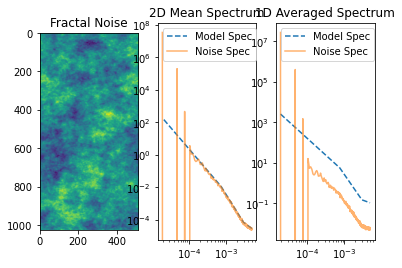

In [1]:
import matplotlib.pyplot as plt
import numpy as num
from scipy import interpolate

shift = num.fft.fftshift
fig, ax = plt.subplots(1, 3)

'''
Create fractal noise
'''
nN, nE = 1024, 512
dE, dN = 101., 134.  # Arbitrary values for sampling in dx and dy
amplitude = 50.

rfield = num.random.rand(nN, nE)
spec = num.fft.fft2(rfield)

regime = num.array([.15, .60, 1.])
beta = num.array([5./3, 8./3, 2./3])
beta += 1.  # Betas are defined for 1D PowerSpec, increasing dimension

kE = num.fft.fftfreq(nE, dE)
kN = num.fft.fftfreq(nN, dN)

k = kN if kN.size < kE.size else kE
k = k[k > 0]
k_rad = num.sqrt(kN[:, num.newaxis]**2 + kE[num.newaxis, :]**2)

k0 = 0
k1 = regime[0] * k.max()
k2 = regime[1] * k.max()

r0 = num.logical_and(k_rad > k0, k_rad < k1)
r1 = num.logical_and(k_rad >= k1, k_rad < k2)
r2 = k_rad >= k2

amp = num.empty_like(k_rad)
amp[r0] = k_rad[r0] ** -beta[0]
amp[r0] /= amp[r0].max()

amp[r1] = k_rad[r1] ** -beta[1]
amp[r1] /= amp[r1].max()/amp[r0].min()

amp[r2] = k_rad[r2] ** -beta[2]
amp[r2] /= amp[r2].max()/amp[r1].min()

amp[k_rad == 0.] = amp.max()

amp *= amplitude**2
spec *= num.sqrt(amp)  # We come from powerspec!
noise = num.abs(num.fft.ifft2(spec))

ampN_slice = shift(amp)[:int(amp.shape[0]/2), int(amp.shape[1]/2)]
kN_slice = shift(k_rad)[:int(amp.shape[0]/2), int(amp.shape[1]/2)]

ampE_slice = shift(amp)[int(amp.shape[0]/2), :int(amp.shape[1]/2)]
kE_slice = shift(k_rad)[int(amp.shape[0]/2), :int(amp.shape[1]/2)]

ax[0].imshow(noise)
ax[0].set_title('Fractal Noise')


'''
Model spec for 1D (used for comparison)
'''
k = num.linspace(max(kE[kE > 0.].min(), kN[kN > 0.].min()),
                 max(kE.max(), kN.max()), 512)
k1d = k

r0 = num.logical_and(k1d >= k0, k1d < k1)
r1 = num.logical_and(k1d >= k1, k1d < k2)
r2 = k1d >= k2

beta1d = num.array([5./3, 8./3, 2./3])
amp1d = num.zeros_like(k1d)

amp1d[r0] = k[r0] ** -(beta1d[0])
amp1d[r0] /= amp1d[r0].max()

amp1d[r1] = k[r1] ** -(beta1d[1])
amp1d[r1] /= amp1d[r1].max()/amp1d[r0].min()

s2 = k ** -beta[1]
amp1d[r2] = k[r2] ** -(beta1d[2])
amp1d[r2] /= amp1d[r2].max()/amp1d[r1].min()

amp1d *= amplitude**2  # We are in the powerspec


'''
Noise analysis from random 2D spectrum
'''
spec = shift(num.fft.fft2(noise))
pspec = num.abs(spec)**2
pspec[k_rad == 0.] = 0.

kE = shift(num.fft.fftfreq(spec.shape[1], dE))
kN = shift(num.fft.fftfreq(spec.shape[0], dN))
k_rad = num.sqrt(kN[:, num.newaxis]**2 + kE[num.newaxis, :]**2)

kE = shift(num.fft.fftfreq(spec.shape[1], dE))
kN = shift(num.fft.fftfreq(spec.shape[0], dN))

power_interp = interpolate.RectBivariateSpline(kN, kE, pspec)


def power2DMean(k, N=256):
    """ Mean 2D Power works! """
    theta = num.linspace(-num.pi, num.pi, N, False)
    power = num.empty_like(k)
    for i in range(k.size):
        kE = num.sin(theta) * k[i]
        kN = num.cos(theta) * k[i]
        power[i] = num.median(power_interp.ev(kN, kE) * 4 * num.pi)
        # Median is more stable than the mean here
    return power / pspec.size


def power1D(k, N=256):
    """ Here we need to normalize the power over the radius
    But scaling does not work """
    theta = num.linspace(-num.pi, num.pi, N, False)
    power = num.empty_like(k)
    for i in range(k.size):
        kE = num.sin(theta) * k[i]
        kN = num.cos(theta) * k[i]
        power[i] = num.median(power_interp.ev(kN, kE) * k[i])
    return power


ax[1].loglog(kE_slice, ampE_slice, ls='--', label='Model Spec')
ax[1].loglog(k, power2DMean(k), alpha=.6, label='Noise Spec')
ax[1].legend()
ax[1].set_title('2D Mean Spectrum')
# dist = 10**(num.log10(ampE_slice) - num.log10(power1D(kE_slice)))

ax[2].loglog(k1d, amp1d, ls='--', label='Model Spec')
ax[2].loglog(k1d, power1D(k1d), alpha=.6, label='Noise Spec')
ax[2].legend()
ax[2].set_title('1D Averaged Spectrum')
plt.show()

# dist = 10**(num.log10(amp1d) - num.log10(power1D(k1d)))

C:\Users\bscho\AppData\Local\Temp\ipykernel_8500\1965509593.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return (avrg_plen / len(arr), avrg_npths / len(arr), np.array(pths))


0.5848376496602121 7.35
0.35394158260632463 10.776859504132231


C:\Users\bscho\AppData\Local\Temp\ipykernel_8500\1965509593.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return (avrg_plen / len(arr), avrg_npths / len(arr), np.array(pths))


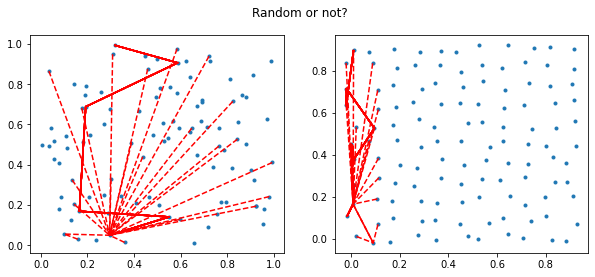

In [1]:
# random or not - determine average structure path lengths (thus measuring the structure sizes) and compare
# to Ramsey number ranges
# improvement: get average pathlength first to establish upper limit and reduce calculations
import numpy as np
from matplotlib import pyplot as plt
import math

def entropy(p):
    'point-entropy of occurance with probability p.'
    if p != 0:
        return - p * math.log(p, 2)
    return 0.

def info_content(p):
    'information content of event with probability p.'
    if p != 0:
        return - math.log(p, 2)
    return 0.

def tot_entropy(dist):
    return sum([entropy(x) for x in dist])

def rand_array(n):
    return np.array(np.random.rand(n, 2))

def nonrand_array(n, pert=40):
    ns = int(np.sqrt(n)) + 1
    res = []
    for nx in range(ns):
        for ny in range(ns):
            res.append([nx/ns+(2*np.random.rand()-1)/pert, ny/ns+(2*np.random.rand()-1)/pert])
    return np.array(res)

def point_grid(arr, n):
    dx = max(arr[:,0]) / n
    dy = max(arr[:,1]) / n
    res = np.zeros((n, n))
    for nx in range(n):
        x = dx * nx
        for ny in range(n):
            y = dy * ny
            for pt in arr:
                if pt[0] > x and pt[0] < x+dx and pt[1] > y and pt[1] < y+dy:
                    res[nx][ny] += 1
    return res / (n**2)

def dist(p0, p1):
    return math.sqrt((p0[0] - p1[0])**2 + (p0[1] - p1[1])**2)

def next_point(ip, parr, d_min=100.):
    idx_min = 0
    for npt, pt in enumerate(parr):
        nxt_dist = dist(parr[ip], pt)
        if nxt_dist < d_min and ip != npt:
            d_min = nxt_dist
            idx_min = npt
    return parr[idx_min]

def connected_path(arr):
    avrg_gpl = avrg_pathlen(1, arr)
    avrg_plen = 0
    avrg_npths = 0
    pths = []  # array for the lines for paths
    for curr_pt in arr:
        plen = avrg_gpl
        pth = []  # one path, coordinates of points
        for ipt, pt in enumerate(arr):
            nxt_pt = next_point(ipt, arr, avrg_gpl)
            nxt_dist = dist(curr_pt, nxt_pt)
            if nxt_dist < (plen / (ipt+1)):
                pth.append([curr_pt[0], curr_pt[1]])
                curr_pt = nxt_pt
            else:
                if ipt > 0:
                    break
            if ipt > 0:
                plen += nxt_dist
            else:
                plen = 2*nxt_dist + 1
        avrg_plen += plen / (ipt+1)
        avrg_npths += ipt
        pths.append(np.array(pth))
    return (avrg_plen / len(arr), avrg_npths / len(arr), np.array(pths))

def avrg_pathlen(l, arr):
    return l / math.sqrt(len(arr))

    
npoints = 100

rarr = rand_array(npoints)  # [[0.4665337  0.86647536]...
#print(connected_path(rarr))
cpth = connected_path(rarr)
print(f'{cpth[0]} {cpth[1]}')

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_figwidth(10)
fig.suptitle('Random or not?')
ax1.scatter(rarr[:,0], rarr[:,1], marker='.')
for idx, this_path in enumerate(cpth[2]):
    ax1.plot(this_path[:,0], this_path[:,1], 'r--')
    if idx == 20:
        break

rarr = nonrand_array(npoints)
#print(connected_path(rarr))
cpth = connected_path(rarr)
print(f'{cpth[0]} {cpth[1]}')

ax2.scatter(rarr[:,0], rarr[:,1], marker='.')
for idx, this_path in enumerate(cpth[2]):
    ax2.plot(this_path[:,0], this_path[:,1], 'r--')
    if idx == 20:
        break

plt.show()

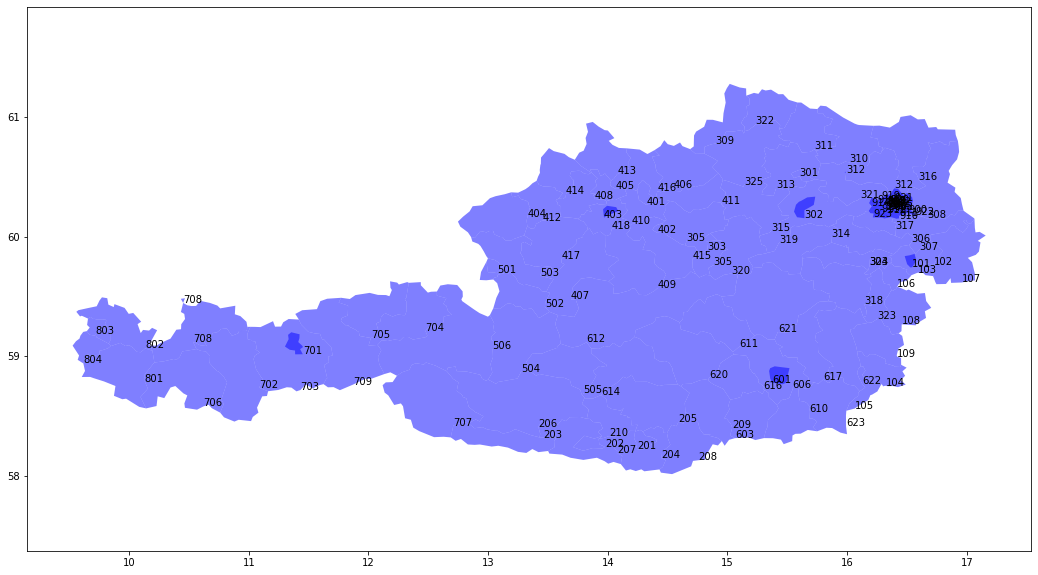

In [13]:
import json
import numpy as np
import os
import matplotlib.pyplot as plt

#Load and read the geojson file for Italys regions. 

#at_url = "https://github.com/ginseng666/GeoJSON-TopoJSON-Austria/blob/81df08cced08b02a873f6375e17424e053a99ac0/2021/simplified-99.9/bezirke_999_geo.json"
#with urllib.request.urlopen(at_url) as url:
        #jdata = json.loads(url.read().decode())
    
s_bricks = [201,303,315,320,401,402,404,407,408,408,413,413,414,416,416,506,602,612,622,623,902,921]
s_sales = [2,1,4,4,1,3,3,2,1,3,1,4,4,2,4,1,5,2,3,6,3,2]
    
# {'type': 'FeatureCollection', 'name': 'bezirke_999_geo', 'crs': 
# {'type': 'name', 'properties': {'name': 'urn:ogc:def:crs:OGC:1.3:CRS84'}}, 'features': 
# [{'type': 'Feature', 'properties': {'iso': '322', 'name': 'Waidhofen an der Thaya'}, 'geometry': 
# {'type': 'MultiPolygon', 'coordinates': [[[[15.235486190707704, 48.75154503502358], [15.218308905888918, 

MY_PATH = r'C:\Users\bscho\Documents\DL\lrgtxt0'
os.chdir(MY_PATH)
with open('AT.geojson', 'r', encoding='utf-8') as f:
    jdata = json.load(f)  # iso is the brick number

fig, axs = plt.subplots()
axs.set_aspect('equal', 'datalim')
fig.set_size_inches(18, 10)

pts = []  # list of points defining boundaries of polygons
for  feature in jdata['features']:
    #print(feature['properties']['iso'])  # brick
    if feature['geometry']['type'] == 'Polygon':
        pts.extend(feature['geometry']['coordinates'][0])      
    elif feature['geometry']['type'] == 'MultiPolygon':
        for polyg in feature['geometry']['coordinates']:
            x = [el[0] for el in polyg[0]]
            y = [el[1]*1.25 for el in polyg[0]]  # stretch into y a bit
            axs.fill(x, y, "b", alpha=0.5)
            axs.annotate(feature['properties']['iso'], xy =(x[0], y[0])) 
    elif feature['geometry']['type'] == 'LineString': 
        pts.extend(feature['geometry']['coordinates'])
    else: pass           

plt.show()

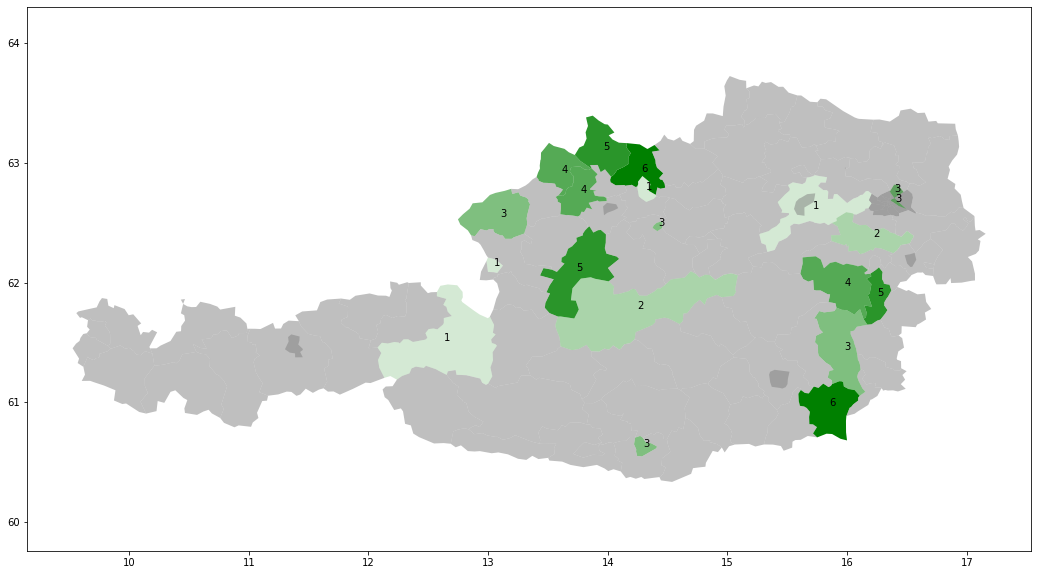

In [1]:
import json
import numpy as np
import os
import matplotlib.pyplot as plt

#Load and read the geojson file for Italys regions. 

#at_url = "https://github.com/ginseng666/GeoJSON-TopoJSON-Austria/blob/81df08cced08b02a873f6375e17424e053a99ac0/2021/simplified-99.9/bezirke_999_geo.json"
#with urllib.request.urlopen(at_url) as url:
        #jdata = json.loads(url.read().decode())
    
#           1   2   3   4   5   6   7   8   9   10  11  12  13  14  15  16  17  18  19  20  21
s_bricks = [201,303,315,316,320,401,402,404,407,408,413,414,416,501,506,602,612,622,623,902,921]
#          1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 
s_sales = [3,2,4,1,5,1,3,3,5,4, 5, 4, 6, 1, 1, 5, 2, 3, 6, 3, 3]
s_exclude = []  # prevent double brick lookup
    
# {'type': 'FeatureCollection', 'name': 'bezirke_999_geo', 'crs': 
# {'type': 'name', 'properties': {'name': 'urn:ogc:def:crs:OGC:1.3:CRS84'}}, 'features': 
# [{'type': 'Feature', 'properties': {'iso': '322', 'name': 'Waidhofen an der Thaya'}, 'geometry': 
# {'type': 'MultiPolygon', 'coordinates': [[[[15.235486190707704, 48.75154503502358], [15.218308905888918, 

MY_PATH = r'C:\Users\bscho\Documents\DL\lrgtxt0'
os.chdir(MY_PATH)
with open('AT0.geojson', 'r', encoding='utf-8') as f:
    jdata = json.load(f)  # iso is the brick number

fig, axs = plt.subplots()
axs.set_aspect('equal', 'datalim')
fig.set_size_inches(18, 10)

pts = []  # list of points defining boundaries of polygons
for  feature in jdata['features']:
    #print(feature['properties']['iso'])  # brick
    if feature['geometry']['type'] == 'Polygon':
        pts.extend(feature['geometry']['coordinates'][0])      
    elif feature['geometry']['type'] == 'MultiPolygon':
        for polyg in feature['geometry']['coordinates']:
            x = [el[0] for el in polyg[0]]
            y = [el[1]*1.3 for el in polyg[0]]  # stretch into y a bit
            if int(feature['properties']['iso']) in s_bricks and not int(feature['properties']['iso']) in s_exclude:
                #print(feature['properties']['iso'], feature['properties']['name'])
                s_exclude.append(int(feature['properties']['iso']))
                if int(s_sales[s_bricks.index(int(feature['properties']['iso']))]) > 0:
                    axs.fill(x, y, "g", alpha=int(s_sales[s_bricks.index(int(feature['properties']['iso']))])/6)
                xt = sum(x) / len(x)  # find center of polygon
                yt = sum(y) / len(y)
                axs.annotate(s_sales[s_bricks.index(int(feature['properties']['iso']))], xy=(xt, yt))
            else:
                axs.fill(x, y, "grey", alpha=0.5)
    elif feature['geometry']['type'] == 'LineString': 
        pts.extend(feature['geometry']['coordinates'])
    else: pass           

plt.show()

<AxesSubplot:xlabel='Date'>

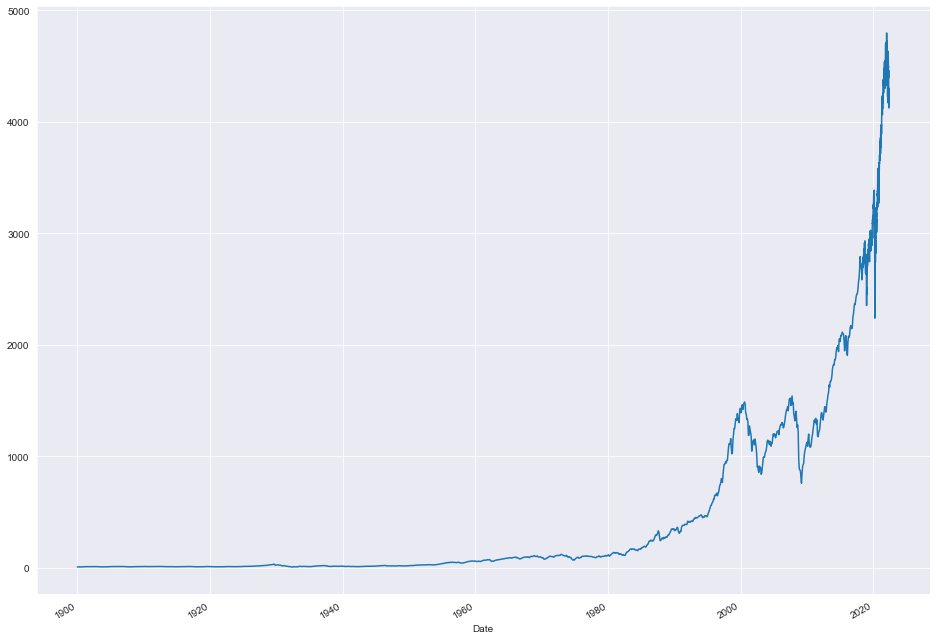

In [1]:
%matplotlib inline
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
sb.set_style('darkgrid')

path = os.getcwd() + '\lrgtxt0\sp500data.csv'
stock_data = pd.read_csv(path, thousands =',')

#print(stock_data.dtypes)
stock_data['SP500']=stock_data['SP500'].astype(float)
#stock_data['Date'] = stock_data['Date'].convert_dtypes()
stock_data['Date'] = pd.to_datetime(stock_data['Date'], format='%d/%m/%Y')

stock_data = stock_data[['Date', 'SP500']]
#print(stock_data)
stock_data = stock_data.sort_index()
stock_data = stock_data.set_index('Date')
#print([cn for cn in stock_data.columns])
#print(stock_data.index)
stock_data['SP500'].plot(figsize=(16, 12))

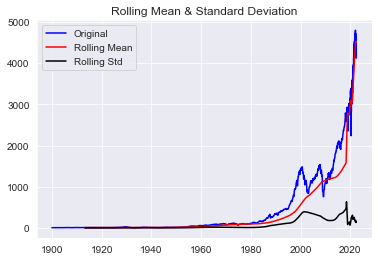

Results of Dickey-Fuller Test:
Test Statistic                    0.022131
pvalue                            0.960324
#Lags Used                        9.000000
Number of Observations Used    2444.000000
Critical Value (1%)              -3.433028
Critical Value (5%)              -2.862723
Critical Value (10%)             -2.567400
dtype: float64


In [2]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):  # Determing rolling statistics
    rolmean = pd.Series(timeseries['SP500']).rolling(window=160).mean()
    rolstd = pd.Series(timeseries['SP500']).rolling(window=160).std()
    # Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    # Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','pvalue','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    
test_stationarity(stock_data)

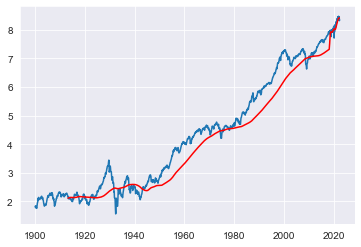

In [3]:

sp_log = np.log(pd.Series(stock_data['SP500']))
mvg_avrg = sp_log.rolling(window=160).mean()
plt.plot(sp_log)
plt.plot(mvg_avrg, color='r')
plt.show()

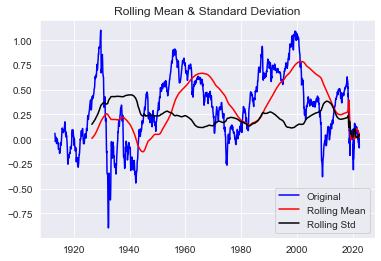

Results of Dickey-Fuller Test:
Test Statistic                   -3.226883
pvalue                            0.018480
#Lags Used                       21.000000
Number of Observations Used    2273.000000
Critical Value (1%)              -3.433230
Critical Value (5%)              -2.862812
Critical Value (10%)             -2.567447
dtype: float64


In [4]:
def test_stationarity_reg(timeseries):  # Determing rolling statistics
    rolmean = pd.Series(timeseries).rolling(window=160).mean()
    rolstd = pd.Series(timeseries).rolling(window=160).std()
    # Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    # Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','pvalue','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
          
tdiff = sp_log - mvg_avrg
tdiff.dropna(inplace=True)
test_stationarity_reg(tdiff)  # check if test stat < critical value: then likely stationary

In [5]:
sp_log = np.log(pd.Series(stock_data['SP500']))
sp_log_df = pd.DataFrame(sp_log, columns = ['SP500'])
sp_log_df.reset_index(inplace=True)
sp_log_df['Date'] = pd.to_datetime(sp_log_df['Date'])
sp_log_df = sp_log_df.set_index('Date')
sp_log_df.dropna(inplace=True)
print(sp_log_df)

               SP500
Date                
1900-01-01  1.808289
1900-02-01  1.826161
1900-03-01  1.834180
1900-04-01  1.846879
1900-05-01  1.798404
...              ...
2022-05-02  8.332159
2022-05-03  8.336985
2022-05-04  8.366410
2022-05-05  8.330109
2022-05-06  8.324419

[2454 rows x 1 columns]


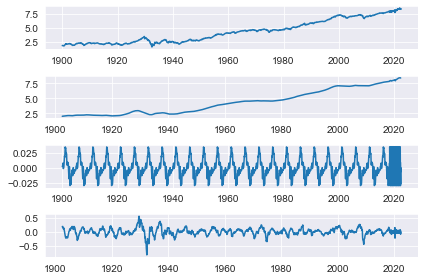

In [6]:
from statsmodels.tsa.seasonal import seasonal_decompose

#sp_log_df = sp_log_df.set_index('Date').asfreq('D')
decomp = seasonal_decompose(sp_log_df, period=60)
#decomp = seasonal_decompose(sp_log_df.values)

trend = decomp.trend
seas = decomp.seasonal
resid = decomp.resid

plt.subplot(411)
plt.plot(sp_log, label="original")
plt.subplot(412)
plt.plot(trend, label="trend")
plt.subplot(413)
plt.plot(seas, label="seas")
plt.subplot(414)
plt.plot(resid, label="resid")
plt.tight_layout()
plt.show()

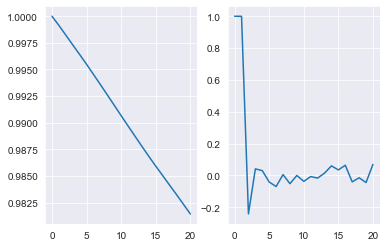

In [10]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(sp_log_df, nlags=20)
lag_pacf = pacf(sp_log_df, nlags=20, method='ols')
plt.subplot(121)
plt.plot(lag_acf)
plt.subplot(122)
plt.plot(lag_pacf)
plt.show()

E:\Anaconda\envs\tfgpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\Anaconda\envs\tfgpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\Anaconda\envs\tfgpu\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


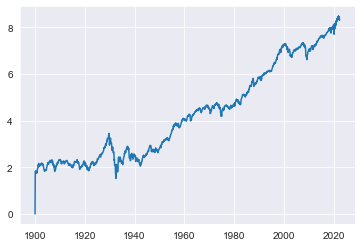

In [14]:
model = ARIMA(sp_log, order=(2,1,2))  # AR: (2,1,0) MA: (0,1,2) ARIMA: (2,1,2)
res_AR = model.fit()
#plt.plot(sp_log_df)
plt.plot(res_AR.fittedvalues)
plt.show()

In [17]:
sp_log[0]

1.8082887711792655

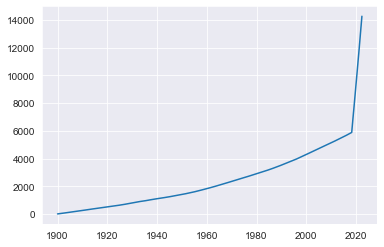

In [26]:
pred_ARIMA_diff = pd.Series(res_AR.fittedvalues, copy=True)
pred_ARIMA_diff_cumsum = pred_ARIMA_diff.cumsum()

pred_ARIMA_lg = pd.Series(sp_log[0], index=sp_log.index)
pred_ARIMA_lg = pred_ARIMA_lg.add(pred_ARIMA_diff_cumsum, fill_value=0)
#pred_ARIMA_lg.head()

#pred_ARIMA = np.exp(pred_ARIMA_lg)
plt.plot(pred_ARIMA_lg)
plt.show()

In [1]:
# multifactorial

def multifact(n, m=1):
    if n % m > 0:
        return 0
    res = n
    for k in range(n-m, 0, -m):
        res *= (n-k)
    return res

print(multifact(6))
print(multifact(6, 2))
print(multifact(6, 3))

720
48
18


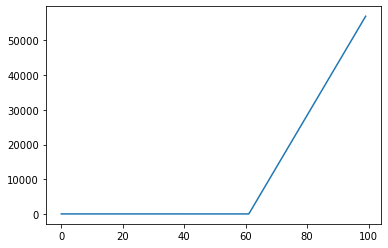

In [1]:
# 10000 collisions
import math
import matplotlib.pyplot as plt

# collision sequence: 0 1 2 1 2 1 2 ... 3

def coll_type0_v1(m1, m2, u2):
    '''returns v1'''
    m1s = m1*m1
    m2s = m2*m2
    u2s = u2*u2
    return ((2*m1*m2*u2) + math.sqrt(4*(m2+1)*m1s*(m2-1)*m2s*u2s+4*m1s*m2s*u2s)) / (2*(m2+1)*m1s)

def coll_type0_v2(m1, m2, u2, v1):
    '''returns v2'''
    return (m2*u2 - m1*v1) / m2

def coll_type1_v1(u1):
    '''returns v1'''
    return -u1

def coll_type2_v2(m1, m2, u1, u2):
    '''returns v2'''
    m1s = m1*m1
    m2s = m2*m2
    u1s = u1*u1
    u2s = u2*u2
    return ((2*u1+m2s/m1)*m2 + math.sqrt((u1*m2/m1*u2)**2*m2s + (m2+m2s/m1)*(m1*u1s+m2*u2s+m1*(u1+m1/m2*u2)**2))) / (m2+m2s/m1)

def coll_type2_v1(m1, m2, u1, u2, v2):
    '''returns v1'''
    return u1 + m2/m1 * (u2 - v2)

def coll_type3_v2(u2):
    '''returns v2'''
    return -u2

def update_pos(x0, v0, dt=0.05):
    return x0 + v0*dt

x1 = 1
x2 = 4
m1 = 1
m2 = 10000
v1 = 0
v2 = -1

xl = []

for t in range(100):
    # handle the collision types
    if x2 <= x1 and v2 < 0 and v1 == 0:
        v1 = coll_type0_v1(m1, m2, v2)
        v2 = coll_type0_v2(m1, m2, v2, v1)
    elif x1 < x2 and x1 <= 0 and v1 < 0:
        v1 = coll_type1_v1(v1)
    elif x2 <= x1 and v2 < 0 and v1 > 0:
        v2 = coll_type2_v2(m1, m2, v1, v2)
        v1 = coll_type2_v1(m1, m2, v1, v2, v2)
    if x1 <= 0 and x2 <= 0:
        v1 = coll_type1_v1(v1)
        v2 = coll_type3_v2(v2)
        
    x1 = update_pos(x1, v1)
    x2 = update_pos(x2, v2)
    
    #print(x1, x2)
    
    xl.append(x2)
    
plt.plot(xl)
plt.show()

In [1]:
# Rakki maths II
import random

def sample_div(n=3):
    n = max(n, 2)
    a = random.randint(10**(n-1), 10**n)
    b = random.randint(10**(n-2), 10**(n-1))
    return (a, b, a//b, a % b)

for i in range(10):
    problem = sample_div()
    print(f"{problem[0]} : {problem[1]} = {problem[2]}, R {problem[3]}")

840 : 65 = 12, R 60
601 : 79 = 7, R 48
400 : 13 = 30, R 10
604 : 41 = 14, R 30
935 : 40 = 23, R 15
732 : 35 = 20, R 32
800 : 36 = 22, R 8
716 : 75 = 9, R 41
415 : 41 = 10, R 5
741 : 89 = 8, R 29


In [7]:



def floyd(x0):
    l = len(x0)
    # Main phase of algorithm: finding a repetition x_i = x_2i.
    # The hare moves twice as quickly as the tortoise and
    # the distance between them increases by 1 at each step.
    # Eventually they will both be inside the cycle and then,
    # at some point, the distance between them will be
    # divisible by the period λ.
    for i, tortoise in enumerate(x0):
        hare = x0[2*i % l]
  
    # At this point the tortoise position, ν, which is also equal
    # to the distance between hare and tortoise, is divisible by
    # the period λ. So hare moving in circle one step at a time, 
    # and tortoise (reset to x0) moving towards the circle, will 
    # intersect at the beginning of the circle. Because the 
    # distance between them is constant at 2ν, a multiple of λ,
    # they will agree as soon as the tortoise reaches index μ.

    # Find the position μ of first repetition.    
    mu = 0
    for i, tortoise in enumerate(x0):
        hare = x0[i]
        mu += 1
 
    # Find the length of the shortest cycle starting from x_μ
    # The hare moves one step at a time while tortoise is still.
    # lam is incremented until λ is found.
    lam = 1
    hare = x0[tortoise]
    while tortoise != hare:
        hare = x0[hare]
        lam += 1
 
    return lam, mu

print(floyd([0, 1, 2, 3, 2, 2]))


(1, 6)
